# CASE STUDY 

## This dataset contains information about Indian startups from Jan 2015 to Aug 2017

#### Feature Details are :-
- SNo - Serial Number
- Date - Date of funding in the format DD/MM/YYYY
- StartupName - Name of the Startup that is funded
- IndustryVertical - Industry to which startup belongs 
- SubVertical - Sub-category of the industry type
- CityLocation - City which the startup is based out of
- InvestorsName - Name of the investors involved in funding round
- InvestmentType - 	Either private equity or seed funding
- AmountInUSD - Funding amount in USD
- Remarks - Other information if any

## INSIGHTS
- What types of startups are getting funded in last few years
- Who are the important investors
- Which fields received maximum fundings recently

### Importing the libraries and loading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
startup

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


### 1. To check the trend of investments over the years 
- Here is a line plot between year and no. of funding received

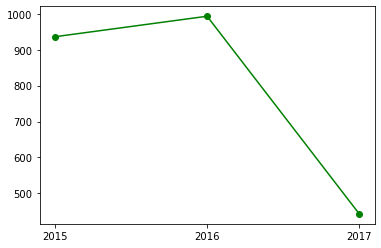

2015 936
2016 993
2017 443


In [3]:
# Data cleaning 
date = startup["Date"]
year = [] #To store the year from each date
for i in date:
    str1 = i
    year.append(str1[len(str1)-4:len(str1):1])    
startup["Year"] = year
val = startup["Year"].value_counts(ascending=True)
xaxis = np.sort(val.index) # To store the year in ascending order
value = []
# Plotting the line graph
for i in xaxis:
    value.append(val.loc[i])
plt.plot(xaxis,value,color="Green",marker="o")
plt.show()
for i in range(len(val)):
    print(xaxis[i],val.loc[xaxis[i]])

### 2. To find out which cities are generally chosen for startups 
- Plotting a pie chart of for the top 10 indian cities preferred for startup with percentage of startups in each of these city

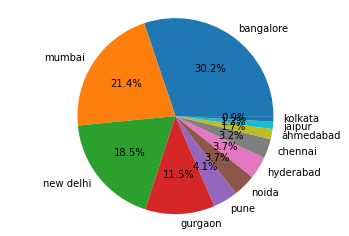

bangalore 630
mumbai 446
new delhi 386
gurgaon 240
pune 85
noida 78
hyderabad 77
chennai 67
ahmedabad 35
jaipur 25
kolkata 19


In [4]:
# startup.dropna(inplace=True)
city = np.array(startup["CityLocation"])
city_n = []
for i in city:
    st1 = str(i).split('/')
    if st1[0]!="nan":
        c = st1[0].lower()
    else:
        c = np.nan
    if c =="delhi":
        c = "new delhi"
    city_n.append(c)
startup["City"] = city_n
# startup.City.fillna("Ghaziabad",inplace=True)
city_name = startup["City"].value_counts(dropna=True).index[0:11]
city_no = startup["City"].value_counts().values[0:11]
plt.pie(city_no,labels=city_name,autopct="%.1f%%")
plt.axis("equal")
plt.show()
for i in range(len(city_name)):
    print(city_name[i],city_no[i])

### 3. To Find out if cities play important role in receiving funding
- Plotting a pie chart of top 10 Indian cities and the percentage of funding they received from total funding

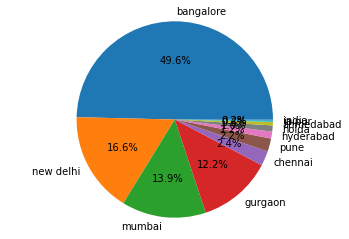

bangalore 8422974108
new delhi 2818247500
mumbai 2354934500
gurgaon 2069021500
chennai 411105000
pune 366653000
hyderabad 195362000
noida 170638000
ahmedabad 98186000
jaipur 35560000
india 30000000


In [5]:
# Do city places an important role in getting funding
startup["AmountInUSD"].fillna("0",inplace=True)
paisa = np.array(startup["AmountInUSD"])
startup["City"].fillna("0",inplace=True)
city = np.array(startup["City"])
for i in range(len(paisa)):
    st = paisa[i].split(',')
    st1 = ""
    for j in range(len(st)):
        st1 = st1+st[j]
    paisa[i] = st1    
funding = {}
for i in range(len(startup["AmountInUSD"])):
    key = city[i]
    if key[len(key)-1]==" ":
        key = key[:len(key)-1]
    if key!="0":
        val = paisa[i]
        funding[key] = funding.get(key,0)+int(val)
sort = sorted(funding.items(),key=lambda x:x[1],reverse=True)     
req = np.array(sort[:11])
cities = req[0:11,0]
fund = req[0:11,1]
plt.pie(fund,labels=cities,autopct="%.1f%%")
plt.axis("equal")
plt.show()
for i in range(11):
    print(sort[i][0],sort[i][1])

### 4. To find out the percentage of amount funded in each of investment type
- Plotting a pie chart to this distribution

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.0


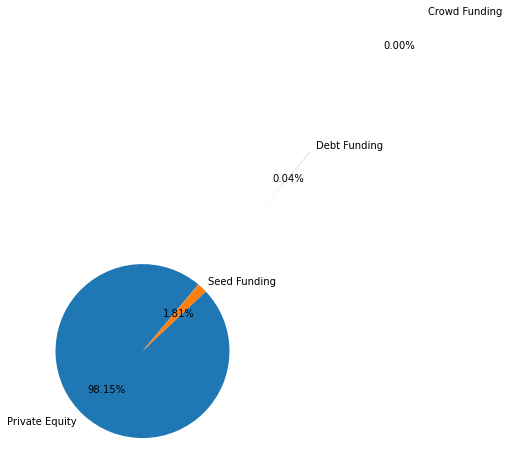

In [8]:
# startup["InvestmentType"].fillna("0",inplace=True)
typ = startup["InvestmentType"]
for i in range(len(typ)):
    if typ[i]=="SeedFunding":
        typ[i] = "Seed Funding"
    elif typ[i]== "PrivateEquity":
        typ[i] = "Private Equity"
    elif typ[i]== "Crowd funding":
        typ[i] = "Crowd Funding"
expplode = [0,0,2,4]        
type_fund = {}
sum1 = 0
for i in range(len(typ)):
    key = str(typ[i])
    if key!="nan":
        val = paisa[i]
        sum1 = sum1 + int(val)
        type_fund[key] = type_fund.get(key,0)+int(val)
for i in type_fund:
    per = (type_fund[i]/sum1)*100
    print(i,round(per,2))
plt.pie(type_fund.values(),labels = type_fund.keys(),autopct="%.2f%%",explode=expplode,startangle=50)
plt.show()

### Which type of companies are more likely to get funding ?
- To answer this question we are going to find out top 5 industries with total amount funded to that industry

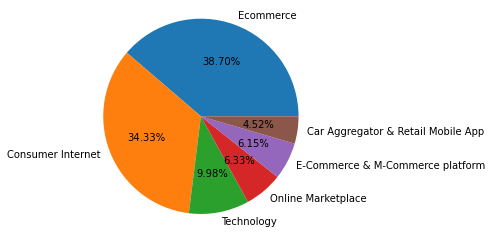

Ecommerce 38.70
Consumer Internet 34.33
Technology 9.98
Online Marketplace 6.33
E-Commerce & M-Commerce platform 6.15
Car Aggregator & Retail Mobile App 4.52


In [45]:
startup.replace(to_replace="ecommerce",value="Ecommerce",inplace=True)
startup.replace(to_replace="eCommerce",value="Ecommerce",inplace=True)
startup.replace(to_replace="ECommerce",value="Ecommerce",inplace=True)
industry = startup["IndustryVertical"]
startup["AmountInUSD"].fillna("0",inplace=True)
paisa = np.array(startup["AmountInUSD"])
company_fund = {}
for i in range(len(paisa)):
    st = paisa[i].split(',')
    st1=""
    for j in range(len(st)):
        st1 = st1+st[j]
    paisa[i] = st1    
for i in range(len(industry)):
    key = str(industry[i])
    if key!="nan":
        val = paisa[i]
        company_fund[key] = company_fund.get(key,0)+int(val)
sort = sorted(company_fund.items(),key = lambda x:x[1],reverse=True) 
srt = np.array(sort[:6])
index = srt[:,0]
value = srt[:,1]
plt.pie(value,labels=index,autopct="%.2f%%")
plt.axis("equal")
plt.show()
sum1=0
for j in range(len(value)):
    sum1 = sum1+int(value[j])
for i in range(len(index)):
    dist = (int(value[i])/sum1)*100
    print(index[i],format(dist,".2f"))

### 4. To find out the top 5 startups with most amount of total funding

In [14]:
#Data cleaning using python
name = startup["StartupName"]
name.replace(to_replace="Flipkart.com",value="Flipkart",inplace=True)
name.replace(to_replace="Paytm Marketplace",value="Paytm",inplace=True)
name.replace(to_replace="Olacabs",value="Ola",inplace=True)
name.replace(to_replace="Ola Cabs",value="Ola",inplace=True)
name.replace(to_replace="Oyo Rooms",value="Oyo",inplace=True)
name.replace(to_replace="OyoRooms",value="Oyo",inplace=True)
name.replace(to_replace="OYOfit",value="Oyo",inplace=True)
name.replace(to_replace="Oyorooms",value="Oyo",inplace=True)
name.replace(to_replace="OYO Rooms",value="Oyo",inplace=True)
d = {}
startup["AmountInUSD"].fillna("0",inplace=True)
fund = np.array(startup["AmountInUSD"])
for i in range(len(fund)):
    st = fund[i].split(",")
    c = ""
    for j in range(len(st)):
        c = c + st[j]
    fund[i] = c    
for i in range(len(name)):
    key = name[i]
    val = fund[i]
    d[key] = d.get(key,0)+int(val)
srt = sorted(d.items(),key = lambda x:x[1],reverse=True)
srt[:6]

[('Paytm', 2340000000),
 ('Flipkart', 2259700000),
 ('Ola', 1899500000),
 ('Snapdeal', 700000000),
 ('Oyo', 637000000),
 ('Quikr', 230000000)]

### 5. To find out top 5 startups who received the fundings most number of times

Ola 8
Swiggy 7
Oyo 6
Flipkart 5
UrbanClap 5
Paytm 4


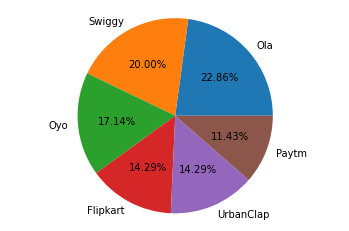

In [23]:
no_fund = {}
name = startup["StartupName"]
name.replace(to_replace="Flipkart.com",value="Flipkart",inplace=True)
name.replace(to_replace="Paytm Marketplace",value="Paytm",inplace=True)
name.replace(to_replace="Olacabs",value="Ola",inplace=True)
name.replace(to_replace="Ola Cabs",value="Ola",inplace=True)
name.replace(to_replace="Oyo Rooms",value="Oyo",inplace=True)
name.replace(to_replace="OyoRooms",value="Oyo",inplace=True)
name.replace(to_replace="OYOfit",value="Oyo",inplace=True)
name.replace(to_replace="Oyorooms",value="Oyo",inplace=True)
name.replace(to_replace="OYO Rooms",value="Oyo",inplace=True)
for i in range(len(name)):
    key = name[i]
    val = int(fund[i])
    if val!=0:
        no_fund[key] = no_fund.get(key,0)+1
srt = sorted(no_fund.items(),key = lambda x:x[1],reverse=True)
for i in range(6):
    print(srt[i][0],srt[i][1])
srt = np.array(srt)    
index = srt[:6,0]
value = srt[:6,1]
plt.pie(value,labels=index,autopct="%.2f%%")
plt.axis("equal")
plt.show()

### 6.  To find out the investors who invested maximum number of times
- Here are the top 10 investors of this period who invested maximum number of times

In [70]:
inv_name = startup["InvestorsName"]
inv_name.replace(to_replace="Undisclosed investors",value="Undisclosed Investors",inplace=True)
investor = {}
ar = []
for i in range(len(inv_name)):
    ky = inv_name[i]
    if ky!="Undisclosed Investors":
        st = str(ky).split(", ")
        for j in range(len(st)):
            ar.append(st[j])
#             investor[st[j]] = investor.get(st[j],0)+1          
ar = np.array(ar)           
for i in range(len(ar)):
    key = ar[i]
    investor[key] = investor.get(key,0)+1
srt = sorted(investor.items(),key = lambda x:x[1],reverse=True)
sort = np.array(srt)
print(sort[:10])

[['Sequoia Capital' '62']
 ['Accel Partners' '52']
 ['Kalaari Capital' '43']
 ['Indian Angel Network' '39']
 ['Blume Ventures' '38']
 ['SAIF Partners' '37']
 ['Ratan Tata' '30']
 ['Nexus Venture Partners' '24']
 ['Tiger Global' '24']
 ['Kae Capital' '22']]
